In [1]:
# !pip install nltk

In [2]:
# !pip install zeyrek

In [3]:
# !pip install TurkishStemmer

In [4]:
import nltk
import zeyrek # https://github.com/obulat/zeyrek
from TurkishStemmer import TurkishStemmer # https://github.com/otuncelli/turkish-stemmer-python

In [5]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /Users/ihp/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
analyzer = zeyrek.MorphAnalyzer()

In [7]:
analyzer.lemmatize("benimkilerden")

[('benimkilerden', ['benimki'])]

In [8]:
stemmer = TurkishStemmer()

In [9]:
stemmer.stem("benimkilerden")

'benimki'

In [13]:
cumle = "Dönülmez akşamın ufkundayım."

In [14]:
stemmer.stem(cumle)

'Dönülmez akşamın ufkundayım.'

In [15]:
analyzer.lemmatize(cumle)

[('Dönülmez', ['dönmek']),
 ('akşamın', ['akşam']),
 ('ufkundayım', ['ufuk']),
 ('.', ['.'])]

In [17]:
for kelime in cumle.split():
    print(stemmer.stem(kelime))

Dönülmez
akşa
ufkundayım.


In [18]:
import pandas as pd

In [46]:
df = pd.read_csv("magaza_yorumlari_duygu_analizi.csv", encoding="utf16") 
# https://www.kaggle.com/datasets/burhanbilenn/duygu-analizi-icin-urun-yorumlari
df.head()

,Görüş,Durum
0,"ses kalitesi ve ergonomisi rezalet, sony olduğ...",Olumsuz
1,hizli teslimat tesekkürler,Tarafsız
2,ses olayı süper....gece çalıştır sıkıntı yok.....,Olumlu
3,geldi bigün kullandık hemen bozoldu hiçtavsiye...,Olumsuz
4,Kulaklığın sesi kaliteli falan değil. Aleti öv...,Olumsuz


In [47]:
len(df)

11429

In [48]:
df["Durum"].unique()

array(['Olumsuz', 'Tarafsız', 'Olumlu'], dtype=object)

In [49]:
df = df[df["Durum"].isin(["Olumlu", "Olumsuz"])]

In [51]:
df["Durum"].unique()

array(['Olumsuz', 'Olumlu'], dtype=object)

In [52]:
len(df)

8491

<AxesSubplot:>

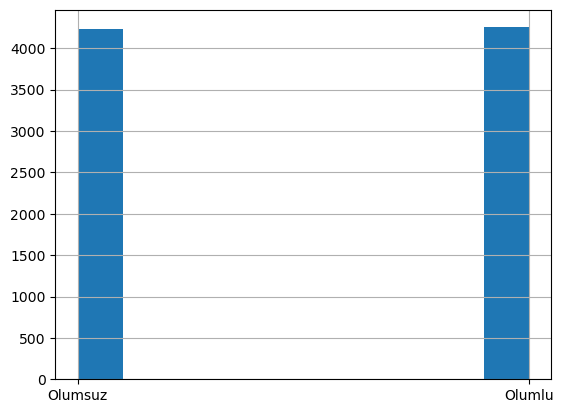

In [53]:
df["Durum"].hist()

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8491 entries, 0 to 11428
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Görüş   8489 non-null   object
 1   Durum   8491 non-null   object
dtypes: object(2)
memory usage: 199.0+ KB


In [56]:
df.isna().sum()

Görüş    2
Durum    0
dtype: int64

In [57]:
df.dropna(inplace=True)

In [58]:
df.isna().sum()

Görüş    0
Durum    0
dtype: int64

In [62]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /Users/ihp/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [63]:
import string
from nltk.corpus import stopwords

In [60]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [93]:
dolgular = stopwords.words("turkish")
dolgular

['acaba',
 'ama',
 'aslında',
 'az',
 'bazı',
 'belki',
 'biri',
 'birkaç',
 'birşey',
 'biz',
 'bu',
 'çok',
 'çünkü',
 'da',
 'daha',
 'de',
 'defa',
 'diye',
 'eğer',
 'en',
 'gibi',
 'hem',
 'hep',
 'hepsi',
 'her',
 'hiç',
 'için',
 'ile',
 'ise',
 'kez',
 'ki',
 'kim',
 'mı',
 'mu',
 'mü',
 'nasıl',
 'ne',
 'neden',
 'nerde',
 'nerede',
 'nereye',
 'niçin',
 'niye',
 'o',
 'sanki',
 'şey',
 'siz',
 'şu',
 'tüm',
 've',
 'veya',
 'ya',
 'yani']

In [76]:
s = "Hey! Naber? İyilik, senden... Ben de iyiyim."
s = s.translate(str.maketrans ('', '', string.punctuation))

In [77]:
s

'Hey Naber İyilik senden Ben de iyiyim'

In [78]:
analiz = analyzer.lemmatize(s)
analiz

[('Hey', ['hey']),
 ('Naber', ['Naber']),
 ('İyilik', ['iyi']),
 ('senden', ['se', 'sen']),
 ('Ben', ['ben']),
 ('de', ['demek', 'de']),
 ('iyiyim', ['iyi'])]

In [79]:
for el in analiz:
    print(el[1][-1])

hey
Naber
iyi
sen
ben
de
iyi


In [90]:
ornek = df.iloc[13]["Görüş"]
ornek

'Arkadaşlar ürün çok güzel ve de sessiz çalışıyo.Kargo hızlıydı fakat ben\nkargoyu takip edemedim(Ceva Lojistik).onun dışında bi sıkıntı yok.Mağaza\nda güvenilir bu arada'

In [91]:
ornek.translate(str.maketrans ('', '', string.punctuation))

'Arkadaşlar ürün çok güzel ve de sessiz çalışıyoKargo hızlıydı fakat ben\nkargoyu takip edemedimCeva Lojistikonun dışında bi sıkıntı yokMağaza\nda güvenilir bu arada'

In [92]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r"\w+")
tokenizer.tokenize(ornek)

['Arkadaşlar',
 'ürün',
 'çok',
 'güzel',
 've',
 'de',
 'sessiz',
 'çalışıyo',
 'Kargo',
 'hızlıydı',
 'fakat',
 'ben',
 'kargoyu',
 'takip',
 'edemedim',
 'Ceva',
 'Lojistik',
 'onun',
 'dışında',
 'bi',
 'sıkıntı',
 'yok',
 'Mağaza',
 'da',
 'güvenilir',
 'bu',
 'arada']

In [102]:
def clean_doc(doc, tok):
    tokens = tok.tokenize(doc)
    clean_tokens = [tok for tok in tokens if tok not in dolgular]
    analiz = analyzer.lemmatize(" ".join(clean_tokens))
    return [el[1][-1] for el in analiz]

In [103]:
tokenizer = RegexpTokenizer(r"\w+")
clean_doc(ornek, tokenizer)

['arkadaş',
 'ürümek',
 'güzel',
 'ses',
 'çalışıyo',
 'kargo',
 'hız',
 'fakat',
 'ben',
 'kargo',
 'takip',
 'etmek',
 'Ceva',
 'Lojistik',
 'on',
 'dış',
 'bi',
 'sıkıntı',
 'yok',
 'mağaza',
 'güvenmek',
 'ara']

In [111]:
df.head()

,Görüş,Durum
0,"ses kalitesi ve ergonomisi rezalet, sony olduğ...",Olumsuz
2,ses olayı süper....gece çalıştır sıkıntı yok.....,Olumlu
3,geldi bigün kullandık hemen bozoldu hiçtavsiye...,Olumsuz
4,Kulaklığın sesi kaliteli falan değil. Aleti öv...,Olumsuz
6,kullanisli baya,Olumlu


In [112]:
# bu işlem uzun sürebilir
df["clean"] = df.apply(lambda row: clean_doc(row["Görüş"], tokenizer), axis=1) 

In [113]:
df.head()

,Görüş,Durum,clean
0,"ses kalitesi ve ergonomisi rezalet, sony olduğ...",Olumsuz,"[ses, kalite, ergonomi, rezalet, Sony, olmak, ..."
2,ses olayı süper....gece çalıştır sıkıntı yok.....,Olumlu,"[ses, olay, süper, ge, çalışmak, sıkıntı, yok,..."
3,geldi bigün kullandık hemen bozoldu hiçtavsiye...,Olumsuz,"[gelmek, bigün, kul, hemen, bozoldu, hiçtavsiy..."
4,Kulaklığın sesi kaliteli falan değil. Aleti öv...,Olumsuz,"[kulak, ses, kalite, fa, değil, alet, övmek, ö..."
6,kullanisli baya,Olumlu,"[kullanisli, Ba]"


In [115]:
df["label"] = df["Durum"].apply(lambda d: 1 if d == "Olumlu" else 0)

In [116]:
df.head()

,Görüş,Durum,clean,label
0,"ses kalitesi ve ergonomisi rezalet, sony olduğ...",Olumsuz,"[ses, kalite, ergonomi, rezalet, Sony, olmak, ...",0
2,ses olayı süper....gece çalıştır sıkıntı yok.....,Olumlu,"[ses, olay, süper, ge, çalışmak, sıkıntı, yok,...",1
3,geldi bigün kullandık hemen bozoldu hiçtavsiye...,Olumsuz,"[gelmek, bigün, kul, hemen, bozoldu, hiçtavsiy...",0
4,Kulaklığın sesi kaliteli falan değil. Aleti öv...,Olumsuz,"[kulak, ses, kalite, fa, değil, alet, övmek, ö...",0
6,kullanisli baya,Olumlu,"[kullanisli, Ba]",1


In [117]:
import random
for i in range(4):
    rand_idx = random.randrange(len(df))
    gorus = df.iloc[rand_idx]["Görüş"]
    print(f"Orijinal - {df.iloc[rand_idx]['Durum']}:")
    print(gorus + "\n")
    print("Temizlenmiş:")
    print(" ".join(df.iloc[rand_idx]["clean"]) + "\n")  
    print("/" * 50 + "\n")  

Orijinal - Olumsuz:
2 aydir kullaniyorum 2 kere ampul patladi cekmiyor cok sesli servis hepsi normal diyor 5 para etmez

Temizlenmiş:
2 aydir kullaniyorum 2 ker ampul patladi cekmiyor cok ses servis normal demek 5 para etmek

//////////////////////////////////////////////////

Orijinal - Olumlu:
Harika bir ürün tavsiye ederim 👌🏻

Temizlenmiş:
harika bir ürümek tavsiye eder

//////////////////////////////////////////////////

Orijinal - Olumlu:
Hızlı teslimat için teşekkürler

Temizlenmiş:
hız teslimat teşekkür

//////////////////////////////////////////////////

Orijinal - Olumlu:
ürünü 6 ay önce anneme aldım arada bende kullandim ve uzun süreli kullanım sonrasi kesinlikle tavsiye ederim. kaliteli malzeme, mükemmel taban ve kolay kullanimiyla çok rahat bir ütü

Temizlenmiş:
ürün 6 aymak önce anne Al ara bent kullandim uzun süre kullanım sonrasi kesinlikle tavsiye eder kalite malzeme mükemmel taba kolay kullanimiyla rahat bir ütü

//////////////////////////////////////////////////

